In [1]:
pwd

'/nfs/hpc/share/badhes/blstm-pix2code/pix2code/pytorch_pix2code'

In [2]:
from util import UIDataset, Vocabulary
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch
from torch.utils.data import DataLoader
from model import *
from torchvision import transforms
from PIL import Image

In [3]:
dataset = UIDataset('./dataset/training', 'voc.pkl')

In [4]:
net = Pix2Code().cuda()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr = 0.0001)

In [5]:
for epoch in range(10):
    net.zero_grad()
    for j, data in enumerate(dataset):
        image, context, prediction = data
        image = image.unsqueeze(0).cuda()
        context = context.unsqueeze(0).cuda()
        prediction = prediction.cuda()
        output = net(image, context)
        output = output.squeeze(0)
        prediction = torch.argmax(prediction, 1)
        loss = criterion(output, prediction)
        loss.backward()
        if j%10 == 0:
            optimizer.step()
            print('Loss: {}, Epoch: {}'.format(loss.data, epoch))
            net.zero_grad()

torch.save(net.state_dict(), './pix2code.weights')

/nfs/hpc/share/badhes/blstm-pix2code/pix2code/pytorch_pix2code/util.py:97: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /pytorch/torch/csrc/utils/tensor_new.cpp:254.)
  return torch.tensor(context_vec, dtype=torch.float), torch.tensor(prediction_vec, dtype=torch.float)


Loss: 2.9339759349823, Epoch: 0
Loss: 2.88208270072937, Epoch: 0
Loss: 2.832848310470581, Epoch: 0
Loss: 2.7667269706726074, Epoch: 0
Loss: 2.64204740524292, Epoch: 0
Loss: 2.5319032669067383, Epoch: 0
Loss: 2.4687232971191406, Epoch: 0
Loss: 2.4390573501586914, Epoch: 0
Loss: 2.4368269443511963, Epoch: 0
Loss: 2.377702474594116, Epoch: 0
Loss: 2.3569881916046143, Epoch: 0
Loss: 2.3922061920166016, Epoch: 0
Loss: 2.368877649307251, Epoch: 0
Loss: 2.3373050689697266, Epoch: 0
Loss: 2.3846614360809326, Epoch: 0
Loss: 2.336782217025757, Epoch: 0
Loss: 2.316851854324341, Epoch: 0
Loss: 2.327791929244995, Epoch: 0
Loss: 2.329989433288574, Epoch: 0
Loss: 2.3243815898895264, Epoch: 0
Loss: 2.323463201522827, Epoch: 0
Loss: 2.308335542678833, Epoch: 0
Loss: 2.3020834922790527, Epoch: 0
Loss: 2.285098075866699, Epoch: 0
Loss: 2.2978198528289795, Epoch: 0
Loss: 2.2896671295166016, Epoch: 0
Loss: 2.2856175899505615, Epoch: 0
Loss: 2.453305721282959, Epoch: 0
Loss: 2.297351837158203, Epoch: 0
Loss

In [6]:
net = Pix2Code()
net.load_state_dict(torch.load('./pix2code.weights'))
net.cuda().eval()

Pix2Code(
  (image_encoder): ImageEncoder(
    (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
    (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (conv6): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1))
    (fc1): Linear(in_features=100352, out_features=1024, bias=True)
    (fc2): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (context_encoder): ContextEncoder(
    (rnn): RNN(19, 128, num_layers=2, batch_first=True)
  )
  (decoder): Decoder(
    (rnn): RNN(1152, 512, num_layers=2, batch_first=True)
    (l1): Linear(in_features=512, out_features=19, bias=True)
  )
)

In [13]:
test_data = UIDataset('./dataset/evaluation', 'voc.pkl')
vocab = Vocabulary('voc.pkl')

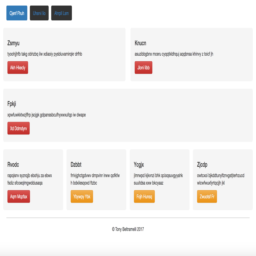

In [14]:
image, *_ = test_data.__getitem__(np.random.randint(len(test_data)))
t = transforms.ToPILImage()
image = image.unsqueeze(0)
t(image.squeeze())

In [15]:
image = image.cuda()
ct = []
ct.append(vocab.to_vec(' '))
ct.append(vocab.to_vec('<START>'))
output = ''
for i in range(200):
    context = torch.tensor(ct).unsqueeze(0).float().cuda()
    index = torch.argmax(net(image, context), 2).squeeze()[-1:].squeeze()
    v = vocab.to_vocab(int(index))
    if v == '<END>':
        break
    output += v
    ct.append(vocab.to_vec(v))

with open('./compiler/output.gui', 'w') as f:
    f.write(output)

print(output)

header{
btn-inactive,btn-active,btn-active
row{
double{
small-title,text,btn-red
}
double{
small-title,text,btn-orange
}
}

